# Complex Numbers (Not Scary)

**Companion notebook for:** [`complex-numbers-not-scary.md`](./complex-numbers-not-scary.md)

This notebook demonstrates:
- Complex numbers as rotation operators
- Phase and its effect on quantum states
- Why interference requires complex amplitudes
- Euler's formula in action

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

plt.style.use('seaborn-v0_8-darkgrid')
np.set_printoptions(precision=3, suppress=True)

## 1. Complex Numbers as Rotation

The lesson says: "Complex numbers encode magnitude and which way."

Let's visualize this on the complex plane.

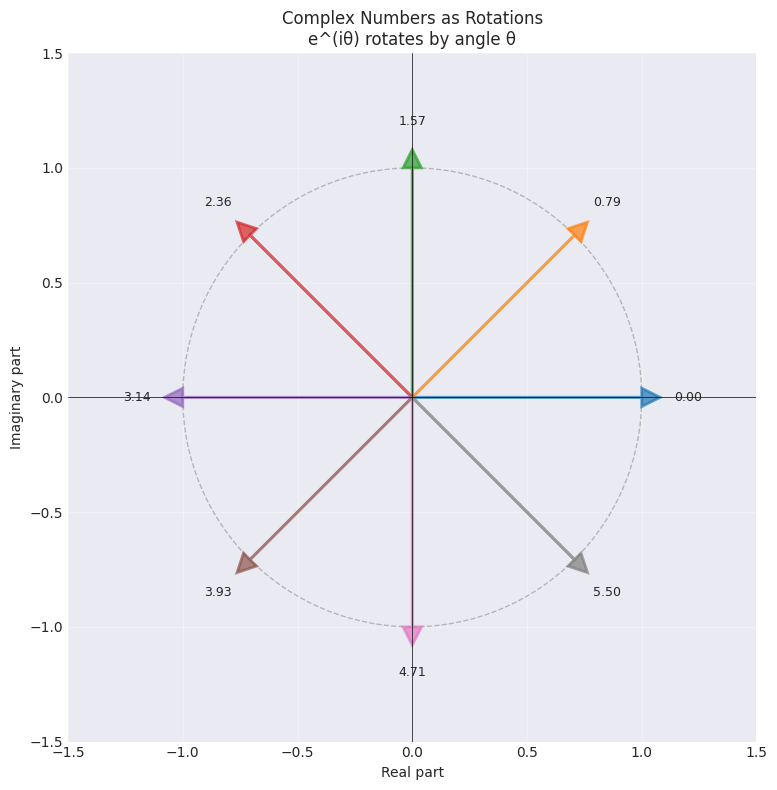

Key insight: e^(iθ) represents a rotation by angle θ
All these complex numbers have magnitude 1 but different "directions"


In [2]:
# Create complex numbers at different angles
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
complex_nums = [np.exp(1j * theta) for theta in angles]

fig, ax = plt.subplots(figsize=(8, 8))

# Plot unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
ax.add_patch(circle)

# Plot complex numbers as arrows
for i, z in enumerate(complex_nums):
    ax.arrow(0, 0, z.real, z.imag, head_width=0.08, head_length=0.08, 
             fc=f'C{i}', ec=f'C{i}', linewidth=2, alpha=0.7)
    # Label with angle
    label_r = 1.2
    ax.text(label_r * z.real, label_r * z.imag, f'{angles[i]:.2f}', 
            ha='center', va='center', fontsize=9)

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_title('Complex Numbers as Rotations\ne^(iθ) rotates by angle θ')

plt.tight_layout()
plt.show()

print("Key insight: e^(iθ) represents a rotation by angle θ")
print("All these complex numbers have magnitude 1 but different \"directions\"")

## 2. Euler's Formula in Action

e^(iθ) = cos(θ) + i·sin(θ)

In [3]:
# Pick a specific angle
theta = np.pi / 3  # 60 degrees

# Two ways to compute the same thing
method1 = np.exp(1j * theta)
method2 = np.cos(theta) + 1j * np.sin(theta)

print(f"Angle: {theta:.4f} radians ({np.degrees(theta):.1f} degrees)")
print(f"\nMethod 1 (e^(iθ)):          {method1}")
print(f"Method 2 (cos + i·sin):     {method2}")
print(f"\nDifference: {abs(method1 - method2):.10f}")
print("\n→ They're the same! Euler's formula works.")

Angle: 1.0472 radians (60.0 degrees)

Method 1 (e^(iθ)):          (0.5000000000000001+0.8660254037844386j)
Method 2 (cos + i·sin):     (0.5000000000000001+0.8660254037844386j)

Difference: 0.0000000000

→ They're the same! Euler's formula works.


## 3. Phase in Quantum States

Two states can have the same probabilities but different phases.

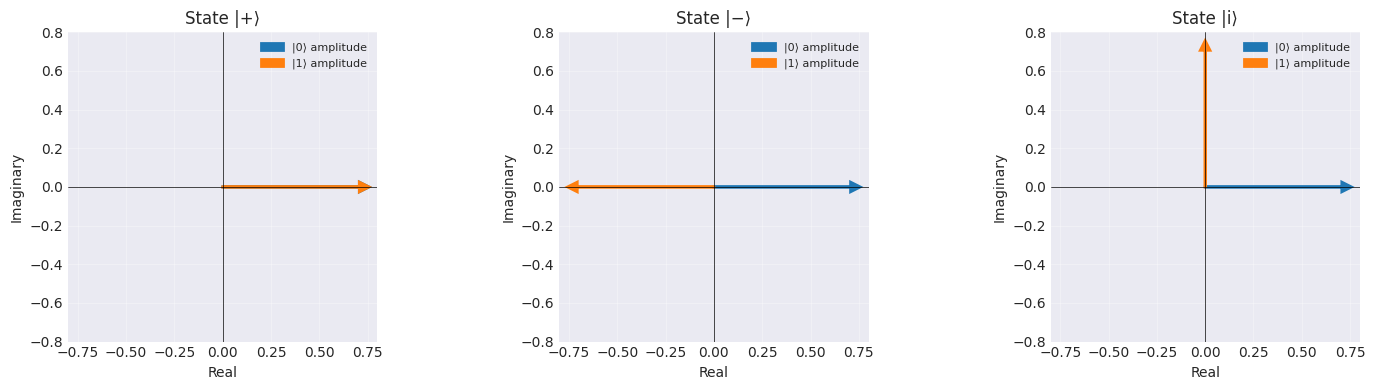

Measurement probabilities:
|+⟩: [0.5 0.5]
|−⟩: [0.5 0.5]
|i⟩: [0.5 0.5]

→ All three give 50/50 probabilities!
→ But they are DIFFERENT states (different phases).


In [4]:
# Create states with different relative phases
state1 = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])                    # |+⟩
state2 = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])                   # |−⟩  
state3 = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])                   # |i⟩

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (state, name) in enumerate([(state1, '|+⟩'), (state2, '|−⟩'), (state3, '|i⟩')]):
    ax = axes[idx]
    
    # Plot amplitudes on complex plane
    for i, amp in enumerate(state.data):
        ax.arrow(0, 0, amp.real, amp.imag, head_width=0.05, head_length=0.05,
                fc=f'C{i}', ec=f'C{i}', linewidth=2, label=f'|{i}⟩ amplitude')
    
    ax.set_xlim([-0.8, 0.8])
    ax.set_ylim([-0.8, 0.8])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title(f'State {name}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Show that probabilities are the same
print("Measurement probabilities:")
print(f"|+⟩: {state1.probabilities()}")
print(f"|−⟩: {state2.probabilities()}")
print(f"|i⟩: {state3.probabilities()}")
print("\n→ All three give 50/50 probabilities!")
print("→ But they are DIFFERENT states (different phases).")

## 4. Interference Requires Complex Amplitudes

Why can't we just use real numbers? Because interference needs cancellation.

In [5]:
# Two paths that can interfere
amplitude1 = 0.5
amplitude2_constructive = 0.5   # Same phase
amplitude2_destructive = -0.5   # Opposite phase

print("Constructive interference:")
print(f"  Path 1: {amplitude1}")
print(f"  Path 2: {amplitude2_constructive}")
print(f"  Total:  {amplitude1 + amplitude2_constructive}")
print(f"  Probability: {(amplitude1 + amplitude2_constructive)**2}")

print("\nDestructive interference:")
print(f"  Path 1: {amplitude1}")
print(f"  Path 2: {amplitude2_destructive}")
print(f"  Total:  {amplitude1 + amplitude2_destructive}")
print(f"  Probability: {(amplitude1 + amplitude2_destructive)**2}")

print("\n→ Amplitudes can cancel completely!")
print("→ This is impossible with classical probabilities.")
print("→ This is why quantum algorithms work.")

Constructive interference:
  Path 1: 0.5
  Path 2: 0.5
  Total:  1.0
  Probability: 1.0

Destructive interference:
  Path 1: 0.5
  Path 2: -0.5
  Total:  0.0
  Probability: 0.0

→ Amplitudes can cancel completely!
→ This is impossible with classical probabilities.
→ This is why quantum algorithms work.


## Summary

From this notebook, you should understand:

1. **Complex numbers = rotations** — they encode direction on a circle
2. **Euler's formula** — e^(iθ) is just a convenient notation for rotation
3. **Phase matters** — states with same probabilities can behave differently
4. **Interference requires complex amplitudes** — cancellation is the quantum advantage

**Next:** [Bloch Sphere Intuition](../02-single-qubit-world/bloch-sphere.ipynb)  
Where we'll visualize the full single-qubit state space.